In [ ]:
!pip install vega_datasets==0.9.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Start writing code here...
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import altair as alt
from vega_datasets import data

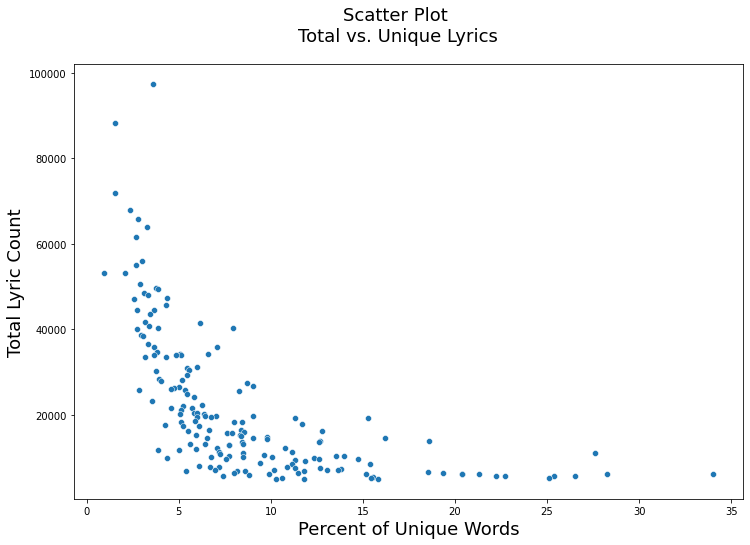

In [ ]:
#we didn't end up using this chart. We made a very similar one, but as an interactive model 

metal_analysis_df = pd.read_csv('/work/lyrical_analysis/metal_analysis.csv')

fig = sns.scatterplot(data = metal_analysis_df, x = "unique_ratio", y = "tokenized_lyrics")
fig.figure.suptitle("Scatter Plot \nTotal vs. Unique Lyrics", fontsize = 18)
plt.xlabel('Percent of Unique Words', fontsize=18)
plt.ylabel('Total Lyric Count', fontsize=18)

fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.show()

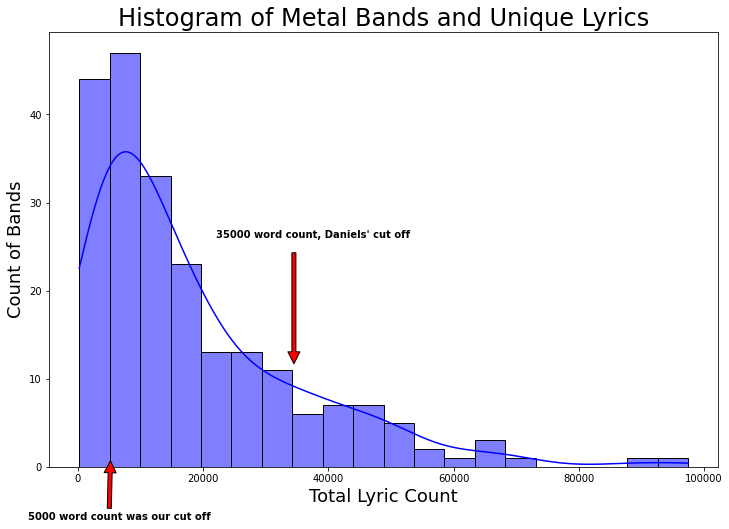

In [ ]:
### Below is the code for Figure 1)

sns.histplot(data = metal_df2
            ,x = 'tokenized_lyrics'
            ,color = 'blue'
            ,bins=20
            ,kde = True
            ).set_title("Histogram of Metal Bands and Unique Lyrics", fontsize=24)
plt.xlabel('Total Lyric Count', fontsize=18)
plt.ylabel('Count of Bands', fontsize=18)
plt.text(-8000, -6, "5000 word count was our cut off", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.annotate('', xy=(5200, 1), xytext=(5000, -5),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.text(22000, 26, "35000 word count, Daniels' cut off", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.annotate('', xy=(34500, 11), xytext=(34500, 25),
            arrowprops=dict(facecolor='red', shrink=0.05))
fig = plt.gcf()
fig.set_size_inches(12, 8)

In [ ]:
### Below is the code for Figure 2)

metal = metal_analysis_df
metal = metal.rename(columns={'add_one':'unique_words'})

# scatter plots of points
scatter = alt.Chart(metal).mark_circle().encode(
    #x='unique_ratio:Q',
    #y='tokenized_lyrics:Q',
    x=alt.X('unique_ratio:Q', title='Percent of Unique Words'),
    y=alt.Y('tokenized_lyrics:Q', title='Total Lyric Count'),

    tooltip=['artist:N','tokenized_lyrics:Q','unique_words:Q',
             'unique_ratio:Q']
).configure_axis(
    titleFontSize=20,
    labelFontSize=18,
).interactive().properties(title="Interactive Scatter Plot - Total vs. Unique Lyrics"
                            ).configure(font="Arial",title=alt.TitleConfig(fontSize=17)
                            )
# # legend
# legend = alt.Chart(cars).mark_rect().encode(
#     y=alt.Y('Origin:N', axis=alt.Axis(title='Select Origin')),
#     color=alt.condition(click, 'Origin:N', 
#                         alt.value('lightgray'), legend=None),
#     size=alt.value(250)
# ).properties(
#     selection=click
# )

chart = scatter
chart
# chart.save('metal_only.html')

alt.Chart(...)

In [ ]:
metal_vocab = pd.read_csv('/work/lyrical_analysis/metal_analysis.csv')
metal_vocab = metal_vocab[['artist','add_one','unique_ratio']]
metal_vocab = metal_vocab.rename(columns = {'add_one':'unique_ct','unique_ratio':'unique_per'})
metal_vocab['genre'] = 'Metal'
metal_vocab.head()

rap_vocab = pd.read_csv('/work/lyrical_analysis/assets/rap_vocab.csv')
rap_vocab = rap_vocab[['rapper_clean','recalc','unique_ratio']]
rap_vocab = rap_vocab.rename(columns = {'rapper_clean':'artist','recalc':'unique_ct','unique_ratio':'unique_per'})
rap_vocab['genre'] = 'Rap / Hip Hop'
rap_vocab.head()

all_vocab_df = pd.concat([metal_vocab,rap_vocab]).sort_values(by ='genre', ascending=False)
all_vocab_df.head()

,artist,unique_ct,unique_per,genre
6,Aesop Rock,7879.0,22.511429,Rap / Hip Hop
52,Gang Starr,4598.0,13.137143,Rap / Hip Hop
72,Juicy J,3275.0,9.357143,Rap / Hip Hop
71,Juelz Santana,3675.0,10.500000,Rap / Hip Hop
70,Joey BadA$$,4871.0,13.917143,Rap / Hip Hop


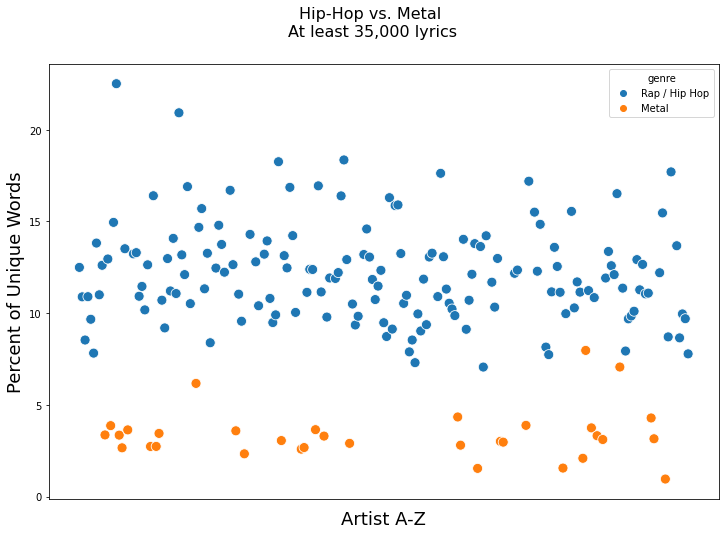

In [ ]:
### Below is the code for Figure 3)

metal_vocab = pd.read_csv('/work/lyrical_analysis/metal_analysis.csv')
metal_vocab = metal_vocab[['artist','add_one','unique_ratio','tokenized_lyrics']]
metal_vocab_over = metal_vocab[metal_vocab['tokenized_lyrics']>34999].reset_index()
metal_vocab_over = metal_vocab_over.rename(columns = {'add_one':'unique_ct','unique_ratio':'unique_per'})
metal_vocab_over = metal_vocab_over[['artist','unique_ct','unique_per']]
metal_vocab_over['genre'] = 'Metal'

comp_genres = pd.concat([metal_vocab_over,rap_vocab])
comp_genres.head()

filter_artists = ['Joey BadA$$']

comp_genres = comp_genres.sort_values(by = 'artist',ascending = True)

# all_vocab_df2.head()

comp_genres = comp_genres[~comp_genres['artist'].isin(filter_artists)].reset_index()

fig2 = sns.scatterplot(data = comp_genres, x = "artist", y = "unique_per", hue = 'genre',s=100)
fig2.set(xticklabels=[]) 
fig2.tick_params(bottom=False)
fig2.figure.suptitle("Hip-Hop vs. Metal \nAt least 35,000 lyrics", fontsize = 16)
plt.xlabel('Artist A-Z', fontsize=18)
plt.ylabel('Percent of Unique Words', fontsize=18)

fig2 = plt.gcf()
fig2.set_size_inches(12, 8)

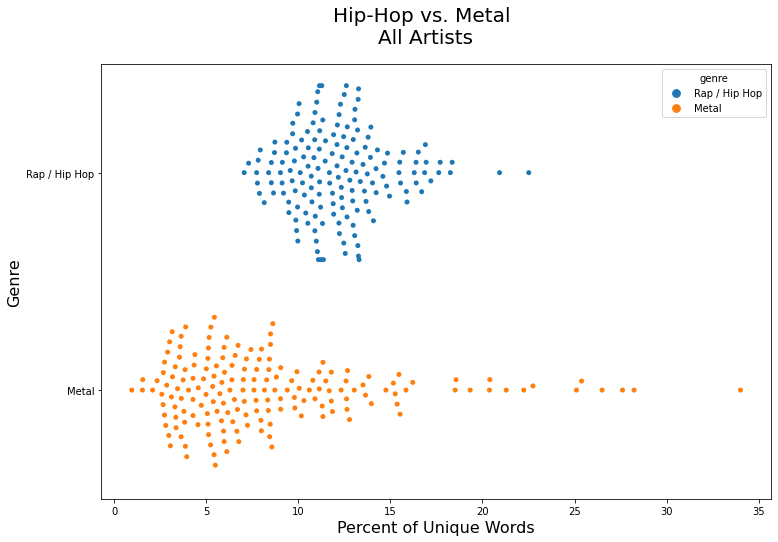

In [ ]:
### Below is the code for Figure 4)

fig = sns.swarmplot(data=all_vocab_df, x="unique_per",y='genre', hue="genre")

fig.figure.suptitle("Hip-Hop vs. Metal \nAll Artists", fontsize = 20)
plt.xlabel('Percent of Unique Words', fontsize=16)
plt.ylabel('Genre', fontsize=16)

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig


plt.show()

In [ ]:
metal = comp_genres

scatter = alt.Chart(metal).mark_circle('center').encode(
    #x='unique_ratio:Q',
    #y='tokenized_lyrics:Q',
    x=alt.X('artist:N', title='Artists A-Z',axis=alt.Axis(labels=False)),
    y=alt.Y('unique_per:Q', title='Percent of Unique Lyrics'),
    text = alt.Text('artist:N'),
    color = alt.Color('genre:N'),


    tooltip=['artist:N','unique_ct:Q','unique_per:Q'],
).configure_axis(
    titleFontSize=18,
    labelFontSize=14,
).properties(width=200)
#.interactive()


scatter



alt.Chart(...)

In [ ]:
metal_df2 = pd.read_csv('/work/lyrical_analysis/test2.csv')

filter_artists = ['Paradox']

metal_df2 = metal_df2[~metal_df2['artist'].isin(filter_artists)].reset_index()

metal_df2.head()



,index,Unnamed: 0,artist,tokenized_lyrics
0,1,1,Dio,97458
1,2,2,Motörhead,88192
2,3,3,Rush,71830
3,4,4,Dream Theater,67967
4,5,5,Metallica,65750


In [ ]:
metal_vocab = pd.read_csv('/work/lyrical_analysis/metal_analysis.csv')
metal_vocab = metal_vocab[['artist','add_one','unique_ratio']]
metal_vocab = metal_vocab.rename(columns = {'add_one':'unique_ct','unique_ratio':'unique_per'})
metal_vocab['genre'] = 'Metal'

rap_vocab = pd.read_csv('/work/lyrical_analysis/assets/rap_vocab.csv')
rap_vocab = rap_vocab[['rapper_clean','recalc','unique_ratio']]
rap_vocab = rap_vocab.rename(columns = {'rapper_clean':'artist','recalc':'unique_ct','unique_ratio':'unique_per'})
rap_vocab['genre'] = 'Rap / Hip Hop'

all_vocab_df = pd.concat([metal_vocab,rap_vocab])


#click = alt.selection_multi(encodings=['color'])

scatter = alt.Chart(all_vocab_df).mark_circle().encode(
    x="unique_per",
    y='genre',
   # x = alt.X('unique_per', scale=alt.Scale(domain=[-20,100])),
   # y = alt.Y('genre', scale=alt.Scale(domain=[-1000, 1000])),
    size=alt.Size('Songs:O',
        scale=alt.Scale(range=(20,100))
    ),
    color=alt.Color('genre', legend=None)
    #tooltip=['Name:N','Horsepower:Q','Miles_per_Gallon:Q',
            # 'Cylinders:O','Origin:N'],
).properties(width=400, height=200).interactive()
scatter

alt.Chart(...)

# Including Time

In [ ]:
# metal_vocab = pd.read_csv('/work/lyrical_analysis/metal_analysis.csv')
# metal_vocab = metal_vocab[['artist','add_one','unique_ratio']]
# metal_vocab = metal_vocab.rename(columns = {'add_one':'unique_ct','unique_ratio':'unique_per'})
# metal_vocab['genre'] = 'Metal'

metal_albums = pd.read_csv('/work/lyrical_analysis/assets/metal_albums.csv')
metal_years = metal_albums.copy()
metal_years = metal_albums.groupby(by = 'artist').agg({'year':'min'})

metal_years['decade'] = (np.where(metal_years['year'] < 1990, '1980s', np.where(
        (metal_years['year'] >= 1990) & (metal_years['year'] <= 1999), '1990s', np.where(
        (metal_years['year'] >= 2000) & (metal_years['year'] <=2009), '2000s', '2010s'
        )))) 

metal_years.head()

#Merge them
metal_vocab_year = metal_vocab.merge(metal_years,left_on = 'artist',right_on = 'artist')
metal_vocab_year.head()

decades_grouped = metal_vocab_year.groupby(by = 'decade').agg({'unique_per':'mean'}).reset_index()
decades_grouped['unique_per'] = decades_grouped['unique_per'] / 100

decades_grouped.head()

bar_chart1 = alt.Chart(decades_grouped).mark_bar().encode(
    x=alt.X('decade:O'),
    y=alt.Y('unique_per:Q',axis=alt.Axis(format='%'))
)


#line_chart = plt.gcf()
#line_chart.set_size_inches(12, 8)
bar_chart1


alt.Chart(...)

In [ ]:
### Below is the code for Figure 5)

metal_vocab_year = metal_vocab.merge(metal_years,left_on = 'artist',right_on = 'artist')
metal_vocab_year.head()

decades_grouped = metal_vocab_year.groupby(by = 'decade').agg({'unique_per':'mean'}).reset_index()
decades_grouped['unique_per'] = decades_grouped['unique_per'] / 100

decades_grouped.head()

bar_chart1 = alt.Chart(decades_grouped).mark_bar().encode(
    x=alt.X('decade:O',axis = alt.Axis(labelAngle=-65),title=None),
    y=alt.Y('unique_per:Q',axis=alt.Axis(format='%',title = None),scale= alt.Scale(domain=[0, .135]))
)

#Merge them
metal_vocab_year_35000 = metal_vocab_over.merge(metal_years,left_on = 'artist',right_on = 'artist')
metal_vocab_year_35000.head()

decades_grouped2 = metal_vocab_year_35000.groupby(by = 'decade').agg({'unique_per':'mean'}).reset_index()
decades_grouped2['unique_per'] = decades_grouped2['unique_per'] / 100

decades_grouped2.head()

bar_chart2 = alt.Chart(decades_grouped2).mark_bar(color='#ff7f0e').encode(
    x=alt.X('decade:O',axis = alt.Axis(labelAngle=-45)),
    y=alt.Y('unique_per:Q',scale= alt.Scale(domain=[0, .135]))
)


#line_chart = plt.gcf()
#line_chart.set_size_inches(12, 8)
(bar_chart1 + bar_chart2).properties(title="Unique Ratios Through the Decades",width = 150
                            ).configure(font="Lato",title=alt.TitleConfig(fontSize=17,anchor='start')
                            ).configure_axis(
    titleFontSize=16,
    labelFontSize=12,
) 

alt.LayerChart(...)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8bd17c4e-3ac7-47d3-9d46-79b1a90f90dd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>